<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Calculo/Actividad_07_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Miguel Angel Perdomo Gaitan
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






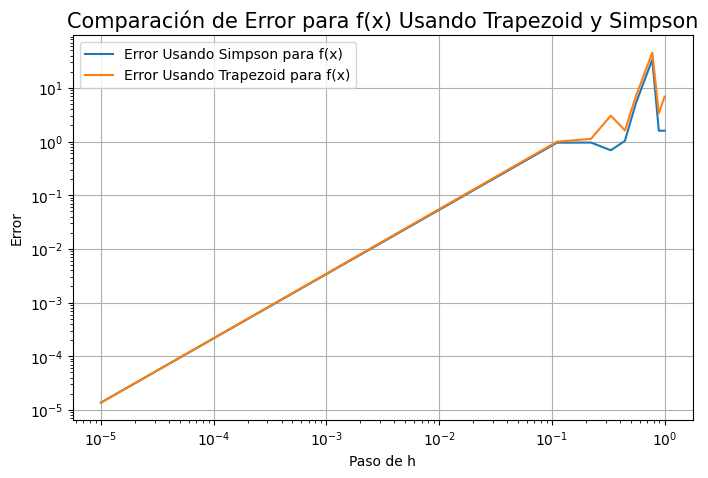

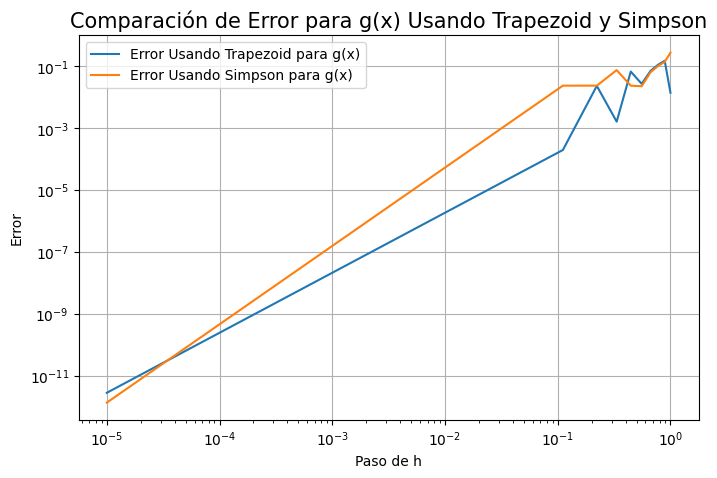

In [29]:
#Declaración primera función
f=lambda x: (np.exp(3*x))*np.sin(x)
#Declaración de la segunda función
g=lambda x: 1/(x*np.log(x))
#primero a cada función aplico el método de simpson
hs=np.linspace(1e-5,1,10)  #array logatirmico con h diferentes
#límites de integración primera función
a_1= 0
b_1=np.pi/4
#límites de integración segunda función
a_2=np.exp(1)
b_2=1+np.exp(1)
#se determina la integral real (usando quad) para cada función respectivamente
integral_real_f, error_f=quad(f,a_1,b_1)
integral_real_g, erro_g=quad(g,a_2,b_2)
#lista donde guardar los errores de cada integral respectiva
error_f_simpson=[] 
error_g_simpson=[]
#ciclo for para evaluar el método de simpson con h distintos
for h in hs:
    x_f=np.arange(a_1,b_1+h,h) #valores de x para evaluar la primera función
    x_g=np.arange(a_2,b_2+h,h) #valores de x para evaluar la segunda función
    if len(x_f)%2==0: #se condiciona que cuando el numeros de puntos sea par se elimine el último para poder usar el método de simpson
        x_f=x_f[:-1]
    if len(x_g)%2==0:
        x_g=x_g[:-1]
    #se evalua los x en cada función respectivamente
    y_f=f(x_f)
    y_g=g(x_g)
    #se encuentra la integral
    integral_f=simpson(y_f,x_f)
    integral_g=simpson(y_g,x_g)
    #se halla el error
    error_f=abs(integral_real_f-integral_f)
    error_g=abs(integral_real_g-integral_g)
    #se guardan los errores en listas
    error_f_simpson.append(error_f)
    error_g_simpson.append(error_g)
#lo anterior se realiza para trapezoide
#listas a guardar los errores
error_f_trapezoid=[]
error_g_trapezoid=[]
#ciclo for para evaluar el método de trapezoide con distintos h
for h in hs:
    x_f=np.arange(a_1,b_1+h,h) #valores de x para evaluar la primera función
    x_g=np.arange(a_2,b_2+h,h) #valores de x para evaluar la segunda función
    #se evalua los x en cada función respectivamente
    y_f=f(x_f)
    y_g=g(x_g)
    #se encuentra la integral
    integral_f=trapezoid(y_f,x_f)
    integral_g=trapezoid(y_g,x_g)
    #se halla el error
    error_f=abs(integral_real_f-integral_f)
    error_g=abs(integral_real_g-integral_g)
    #se guardan los errores en listas
    error_f_trapezoid.append(error_f)
    error_g_trapezoid.append(error_g)
#se grafica los errores en función de h
#se grafica f
plt.figure(figsize=(8,5))
plt.plot(hs,error_f_simpson, label="Error Usando Simpson para f(x)")
plt.plot(hs,error_f_trapezoid, label="Error Usando Trapezoid para f(x)")
plt.title("Comparación de Error para f(x) Usando Trapezoid y Simpson", fontsize=15)
plt.xlabel("Paso de h",fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()
#se grafica g
plt.figure(figsize=(8,5))
plt.plot(hs,error_g_trapezoid, label="Error Usando Trapezoid para g(x)")
plt.plot(hs,error_g_simpson,label="Error Usando Simpson para g(x)")
plt.title("Comparación de Error para g(x) Usando Trapezoid y Simpson", fontsize=15)
plt.xlabel("Paso de h",fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

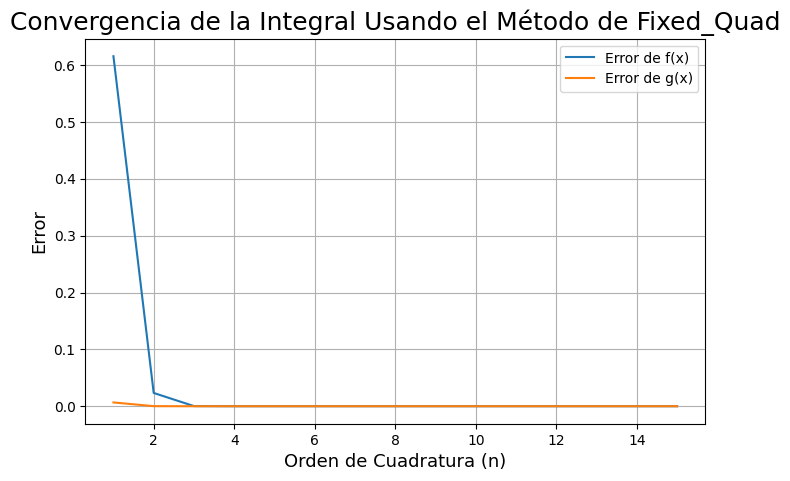

In [39]:
#ahora se mira el error usando fixed_quad
#se declaran las listas donde se guardarán los errores
error_f_fix=[]
error_g_fix=[]
#se crea un arreglo con n para modificar el n en fixed_quad
n=np.arange(1,16,1)
for ni in n:
    #se evalua la integral para n distintos
    integral_f,__=fixed_quad(f,a_1,b_1,n=ni)
    integral_g,_=fixed_quad(g,a_2,b_2,n=ni)
    #se determina el error
    error_f=abs(integral_real_f-integral_f)
    error_g=abs(integral_real_g-integral_g)
    #se guarda el error en una lista
    error_f_fix.append(error_f)
    error_g_fix.append(error_g)
#se grafica
plt.figure(figsize=(8,5))
plt.plot(n,error_f_fix,label="Error de f(x)")
plt.plot(n,error_g_fix, label="Error de g(x)")
plt.title("Convergencia de la Integral Usando el Método de Fixed_Quad",fontsize=18)
plt.xlabel("Orden de Cuadratura (n)", fontsize=13)
plt.ylabel("Error", fontsize=13)
plt.legend()
plt.grid()
plt.show()

Como se puede observar en general un orden de cuadratura 5 será suficiente para qe la convergencia sea muy buena y que la integral converga para cualquier función sin importar que esta no sea muy suave

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [45]:
def variable_interna(y,x):
    """
    Evalua la integral más interna de una integral triple
    Entradas:
    x: Variable más externa de integración (float)
    y: Variable de integración intermedia (float)
    Salida:
    Integral más interna evaluada en los límites 
    """
    integrando=lambda z: (1/y)*np.sin(z/y)
    resultado,__=quad(integrando,0,x*y)
    return resultado
def integral_intermedia(x):
    """
    Evalua la integral intermedia de una integral triple
    Entrada:
    x: Variable más extenerna de integración (float)
    Salida:
    Integral evaluada en los límites
    """
    integrando= lambda y:variable_interna(y,x)
    resultado,__=quad(integrando,0,x)
    return resultado
#ahora se evalúa la integral externa y se imprime el resultado
resultado_triple_quad,error=quad(integral_intermedia,0,np.pi)
print(f"El valor de la integral es: {resultado_triple_quad:.3f}")

El valor de la integral es: 6.935


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [46]:
def gauss_quad_standard(func, n, a , b):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).
    - a: Límite Inferior de la Integral
    - b: límite superior de la integral

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    t, w = roots_legendre(n)
    #hacer cambio de variable
    x=((b-a)/2)*t+(a+b)/2
    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    #ahora se determina la integral de a hasta b
    integral_a_b=integral*((b-a)/2)
    return integral_a_b

#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [8]:
#se declara la tolerancia
tol=1e-3
#se declara cada función respectivamente
f=lambda x: 1/np.sqrt(np.tan(x))
g=lambda x: np.cos(x)/(x**3)
l=lambda y: 1/(np.sqrt(1- y**2))
hs=np.linspace(1e-8,0.001,100) #array de pasos 
#limites de integración de f
a_f,b_f=0,np.pi/2
#se calcula el valor real de la primera
integral_real_f,_=quad(f,a_f,b_f)
#método del trapecio compuesto para f
for h in hs:
    #se hace una array de x para f con un paso h
    x_f=np.arange(a_f+1e-8,b_f-1e-8,h) #no se reemplaza a_f y b_f directamente ya que trapezoid no maneja bien las singularidades
    #se evaluan los x en f
    y_f=f(x_f)
    #se evalua la integral de f usando trapecio
    integral_trap_f=trapezoid(y_f,x_f)
    #se calcula el error
    error_trap_f=abs(integral_real_f-integral_trap_f)
    #se verifica que sea menor que la tolerancia
    if error_trap_f<tol:
        print(f"Con el método del trapecio compuesto la integral es: {integral_trap_f}")
        break

Con el método del trapecio compuesto la integral es: 2.221245433626819


In [9]:
#se aplica el método de simpson
hs=np.linspace(1e-8,0.0001,100) #array de pasos
for h in hs:
    #se hace una array de x para f con un paso h
    x_f=np.arange(a_f+1e-10,b_f-1e-10,h) #no se reemplaza a_f y b_f directamente ya que trapezoid no maneja bien las singularidades
    #se verifica que x sea par o de lo contrario eliminar el último x
    if len(x_f)%2==0:
        x_f=x_f[:-1]
    #se evaluan los x en f
    y_f=f(x_f)
    #se evalua la integral de f usando simpson
    integral_simpson_f=simpson(y_f,x_f)
    #se calcula el error
    error_simpson_f=abs(integral_real_f-integral_trap_f)
    #se verifica que sea menor que la tolerancia
    if error_trap_f<tol:
        print(f"Con el método del trapecio compuesto la integral es: {integral_simpson_f}")
        break

Con el método del trapecio compuesto la integral es: 2.221647502607281


In [10]:
#se calcula la integral de f usando cuadratura Gaussiana
n=np.arange(1,10000,1)
for ni in n:
    #se evalua la integral de f usando fixed_quad
    integral_fixed_f,__=fixed_quad(f,a_f,b_f,n=ni)
    #se calcula el error
    error_trap_f=abs(integral_real_f-integral_fixed_f)
    #se verifica que sea menor que la tolerancia
    if error_trap_f<tol:
        print(f"Con el método del trapecio compuesto la integral es: {integral_fixed_f}")
        break

Con el método del trapecio compuesto la integral es: 2.220441699828402


**Nota Aclaratoria:** Si bien en el ejercicio se pedía encontrar la integral de f con una tolerancia de 1e-5, debido a el comportamiento de la integral, fue imposible que se cumpliera el condicional if error<tol: por tanto, se bajó la tolerancia, el único método que convergió fue quad.

In [11]:
#para g(x)
#se crea un array de pasos (h)
hs=np.linspace(1e-6,0.01,100)
#límite de integración de g
a_g,b_g=1,np.inf
#se encuentra el valor real
integral_real_g,__=quad(g,a_g,b_g)
tol=1e-6
for h in hs:
    #método de trapecio compuesto
    #se encuentra un array de x
    x_g=np.arange(a_g,25,h) #se evalúa x hasta 25 porque trapezoid no maneja bien los límites infinitos
    #se evalúa x en g
    y_g=g(x_g)
    #se evalúa la integral
    integral_trap_g=trapezoid(y_g,x_g)
    #se encuentra el error
    error_g=abs(integral_real_g-integral_trap_g)
    #se condicional que el error debe ser menor que la tolerancia
    if error_g<tol:
        print(f"la integral de g(x) usando trapecio compuesto es {integral_trap_g}")   
        break
for h in hs:
    #método de simpson
    #se encuentra un array de x
    x_g=np.arange(a_g,100,h) #se evalúa x hasta 100 porque simpson no maneja bien límites infinitos
    #se verifica que si len(x) es par, entonces se quita el último elemento del x
    if len(x_g)%2==0:
        x_g=x_g[:-1]
    #se evalúa x en g(x)
    y_g=g(x_g)
    #se encuentra la integral
    integral_simpson_g=simpson(y_g,x_g)
    #se encuentra el error
    error_g=abs(integral_real_g-integral_simpson_g)
    #se condiciona que el error debe ser menor que la tolerancia
    if error_g<tol:
        print(f"la integral de g(x) usando simpson es {integral_simpson_g}")
        break
#se hace un array de n para poder variar la precisión de fixed_quad
n=np.arange(1,1000,1)
for ni in n:
    #método de cuadratura gaussiana
    integral_fixed_g,_=fixed_quad(g,a_g,100,n=ni)
    #se encuentra el error
    error_g=abs(integral_real_g-integral_fixed_g)
    #se condiciona que si error<tol imprime el resultado
    if error_g<tol:
        print(f"La integral de g(x) usando Cuadratura Gaussiana es {integral_fixed_g}")
        break

C:\Users\migue\AppData\Local\Temp\ipykernel_20868\1022463250.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_real_g,__=quad(g,a_g,b_g)


la integral de g(x) usando trapecio compuesto es 0.01811699524377198
la integral de g(x) usando simpson es 0.01811709040101609
La integral de g(x) usando Cuadratura Gaussiana es 0.01811697079658975


In [12]:
#se realiza la última integral
tol=1e-5 #tolerancia
#se determina el valor real
def integral_interna (x):
    """
    Determina usando quad la integral doble.
    Entradas:
    x: variable de integración interna
    Salida:
    Integral respecto a la variable interna de integración
    """
    #se crea la función
    integrando=lambda y: 1/np.sqrt(1- y**2)
    #se evalúa la integral interna
    integral,__=quad(integrando, 0,np.sin(x))
    return integral
#se obtiene el valor real
valor_real,__=quad(integral_interna,0,np.pi/4)
#se emplea fixed_quad
#se realiza la última integral
tol=1e-5 #tolerancia
#se determina el valor real
def integral_interna_fixed (x):
    """
    Usando el método fixed_quad, determina la integral doble.
    Entradas:
    x: variable de integración interna 
    Salidas:
    Integral respecto a la variable interna de integración
    """
    #se crea la función
    integrando=lambda y: 1/np.sqrt(1- y**2)
    #se evalúa la integral interna
    integral,__=quad(integrando, 0,np.sin(x))
    return integral

valor_real,__=quad(integral_interna,0,np.pi/4)
print(valor_real)
for ni in n:
    #se evalúa 
    valor_fixed,__=fixed_quad(integral_interna_fixed,0,np.pi/4,n=ni)
    #se encuentra el error 
    error=abs(valor_real-valor_fixed)
    #se condiciona que error < tol imprima el resultado
    if error<tol:
        print(f"La integral doble usando Fixed_Quad es: {valor_fixed}")
        break
#se determina usando trapezoide compuesto
def doble_trapecio(tol, max_N=500):
    """
    Calcula la integral doble usando integración numérica 
    compuesta por el método del trapecio tanto en la dimensión y (interna) 
    como en la x (externa).

    El número de puntos Nx en el eje x se incrementa adaptativamente
    hasta que el error absoluto con respecto al valor exacto sea menor
    que la tolerancia especificada.

    Parámetros:
    ----------
    tol : float
        Tolerancia absoluta permitida para el error.
    max_N : int
        Máximo número de puntos Nx permitidos para la integración externa.

    Retorna:
    -------
    float
        Valor estimado de la integral doble que satisface la tolerancia.
    """
    I_exact = (np.pi**2) / 32  # Valor exacto de referencia
    for Nx in range(10, max_N, 10):  # Aumentamos Nx de 10 en 10
        x = np.linspace(0, np.pi/4, Nx)  # Puntos en el eje x
        F = []  # Lista para guardar los valores de f(x)
        for xi in x:
            Ny = 100  # Número de puntos en y (puede ajustarse)
            y = np.linspace(0, np.sin(xi), Ny)
            if len(y) < 2:
                F.append(0)  # Si sin(xi) ≈ 0, la integral es 0
                continue
            fy = 1 / np.sqrt(1 - y**2)  # Evaluamos el integrando en y
            F.append(trapezoid(fy, y))  # Integral en y usando trapecio
        I = trapezoid(F, x)  # Integral externa en x
        error = abs(I - I_exact)
        if error < tol:
            print(f"Trapecio: I = {I:.8f} con Nx = {Nx}")
            return I
#evaluamos trapecio
trapecio=doble_trapecio(tol)
def doble_simpson(tol, max_N=500):
    """
    Calcula la integral doble usando integración numérica compuesta 
    por el método de Simpson tanto en la dimensión y (interna) como en la x (externa).

    El número de puntos Nx en el eje x se incrementa adaptativamente
    (solo valores impares) hasta que el error absoluto con respecto al
    valor exacto sea menor que la tolerancia especificada.

    Parámetros:
    ----------
    tol : float
        Tolerancia absoluta permitida para el error.
    max_N : int
        Máximo número de puntos Nx permitidos para la integración externa.

    Retorna:
    -------
    float
        Valor estimado de la integral doble que satisface la tolerancia.
    """
    I_exact = (np.pi**2) / 32  # Valor exacto
    for Nx in range(11, max_N, 10):  # Impares solamente
        if Nx % 2 == 0:
            continue
        x = np.linspace(0, np.pi/4, Nx)
        F = []
        for xi in x:
            Ny = 101  # También impar
            y = np.linspace(0, np.sin(xi), Ny)
            if len(y) < 2:
                F.append(0)
                continue
            fy = 1 / np.sqrt(1 - y**2)
            F.append(simpson(fy, y))  # Integral en y con Simpson
        I = simpson(F, x)  # Integral externa en x con Simpson
        error = abs(I - I_exact)
        if error < tol:
            print(f"Simpson:  I = {I:.8f} con Nx = {Nx}")
            return I
#evaluamos simpson
I_simp = doble_simpson(tol)

0.30842513753404244
La integral doble usando Fixed_Quad es: 0.3084251375340425
Trapecio: I = 0.30842647 con Nx = 10
Simpson:  I = 0.30842514 con Nx = 11
